In [67]:
## http://tiny.cc/DecisionTrees
## http://tiny.cc/04-07-2020
## http://tiny.cc/04-07-2020
## https://docs.google.com/document/d/1TOr5eifhDDeqtizzpk4qDPC9D9LjOwxFOZPbcIBBAEU/edit?usp=sharing


**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation


In [68]:
## importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [69]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [70]:
data.shape

(81, 4)

In [71]:
data


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


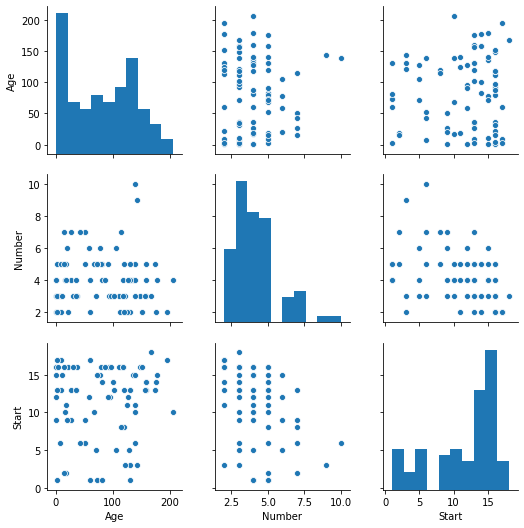

In [72]:
sns.pairplot(data)

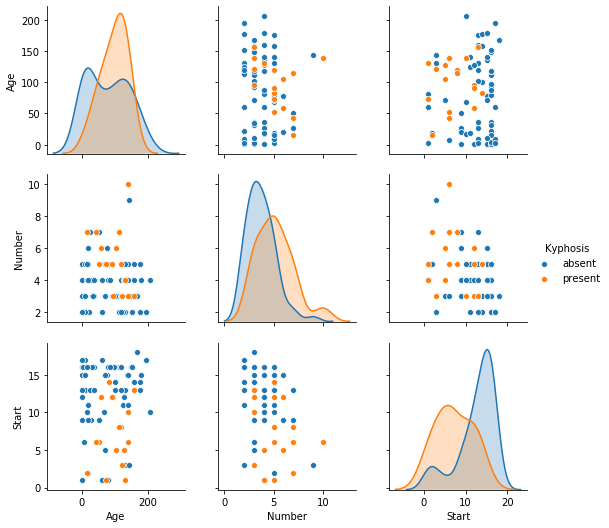

In [73]:
sns.pairplot(data,hue='Kyphosis')

In [74]:
## spliting the data set into input and output

# x=data.iloc[:,1:]
X=data.drop('Kyphosis', axis=1)
y=data.Kyphosis

In [75]:
# train-test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test=train_test_split(X , y , test_size=0.2,random_state=1)

In [76]:
## Aplly the deccision tree algorithm
from sklearn.tree import DecisionTreeClassifier
    
## intialization of object
dtree=DecisionTreeClassifier(criterion='entropy')

## apllying the classifier to the data set
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
## predict on training data
y_train_pred=dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [78]:
## clasification report on training data 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [79]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [80]:
## prediction on text data(unseen data)
## syntax : objections.prediction(inputvalues)
y_test_pred=dtree.predict(X_test)## confusing output of X_test on y_test
## compare the actual values y_test values wit model predicted y_test_pred values
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



In [81]:
## visualize of the decision tree 
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy')

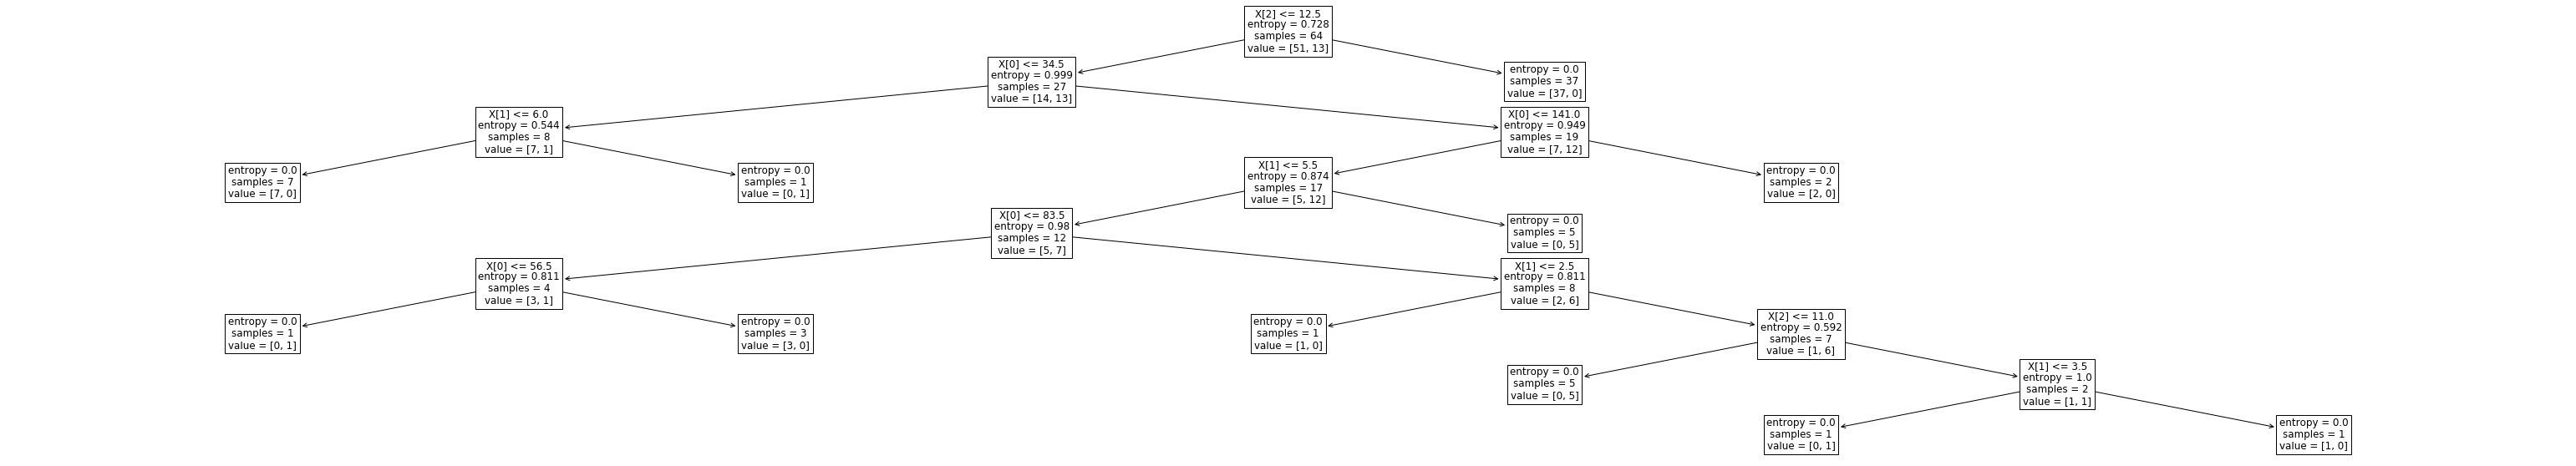

In [82]:
from sklearn import tree 
plt.figure(figsize=(55,10))
tree.plot_tree(dtree)
plt.show()

In [83]:
X_train

,Age,Number,Start
2,128,4,5
35,93,3,16
33,112,3,16
45,139,3,10
15,1,3,16
...,...,...,...
75,178,4,15
9,59,6,12
72,87,4,16
12,18,5,2


In [84]:
### http://tiny.cc/OF-UF
 

In [85]:
# KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, X_train, y_train, cv =5)

array([0.78571429, 0.76923077, 0.92307692, 0.83333333, 0.75      ])

In [86]:
## without spliting if we directly 

# GridSearchCV

In [87]:
#Passing list of values  in a dictionary to find the optimum value for each parameter
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1)
    
}

In [88]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                    

In [89]:
# return the optimal parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}

In [90]:
#Build the model with best parameters
#Initialized the DT Classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 16, min_samples_leaf= 2)

# We need to fit the model to the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      absent       0.77      0.77      0.77        13
     present       0.25      0.25      0.25         4

    accuracy                           0.65        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.65      0.65      0.65        17



- After applying GridSearch, we can say that our scores have been increased to some extent.

In [92]:
 # http://tiny.cc/06-07-2020
## http://tiny.cc/EnsembleLearning


In [93]:
## https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [94]:
#import , intialize and fit
#import the rfc from sklearn
from sklearn.ensemble import RandomForestClassifier

#intialize the object for RFC
rfc =RandomForestClassifier(n_estimators=40)

#nfit the RFC to the dataset
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
# predictions on the test data
#syntax:objectname.pred(inputvalues)
y_pred_train=rfc.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [96]:
# prediction onthe test data(unseen data)
y_pred_test=rfc.predict(X_test)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [104]:
#cross validationscore
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(scores)

0.8421245421245421

In [105]:
# http://tiny.cc/Boosting
